1. [20 pts] Ingest, pre-process, and tokenize the reviews with your favorite approach and then generate a Tf-Idf matrix with 1000 top features (i.e., terms).

In [1]:
import re
from nltk.corpus import stopwords
import nltk
def ie_preprocess(document):
    # Sentence Parse
    document = re.sub('<br />', '', document)
    document = re.sub(r'[^\w\s]', '', document)
    sentences = nltk.sent_tokenize(document)
    
    # Word Parse and remove stopwords
    stop_words = set(stopwords.words('english'))
    
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [[word for word in sent if word.lower() not in stop_words and len(word) > 2 and word.isalpha()] for sent in sentences]
    
    return sentences

In [2]:
import csv
import pandas as pd
path='./movie_data.csv'
df=pd.read_csv(path)
df['review']=df['review'].apply(ie_preprocess)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X = tfidf_vectorizer.fit_transform(df['review'].astype('str'))

In [4]:
y=df['sentiment']

In [5]:
from sklearn.svm import LinearSVC
svc_classifier = LinearSVC()
# Extract the coefficients and feature names
svc_classifier.fit(X,y)

coefficients = svc_classifier.coef_[0]
feature_names = tfidf_vectorizer.get_feature_names_out()
feature_coefficients = list(zip(feature_names, coefficients))

# Sort the feature coefficients
sorted_feature_coefficients = sorted(feature_coefficients, key=lambda x: x[1])

# Print the top and bottom coefficients
def print_top_and_bottom_coefs(sorted_feature_coefficients, num_top=1000):
    print("Keywords for Best:")
    for i, (feature, coefficient) in enumerate(sorted_feature_coefficients[-num_top:][::-1]):
        print(f"#{i+1}, {feature}: {coefficient}")

print_top_and_bottom_coefs(sorted_feature_coefficients)

/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


Keywords for Best:
#1, excellent: 2.529884602225025
#2, great: 2.209359775675167
#3, amazing: 2.182361006859617
#4, perfect: 2.1338399761493014
#5, superb: 2.070968055570446
#6, wonderful: 1.8569305914963186
#7, perfectly: 1.8308612903392067
#8, hilarious: 1.7872180775100392
#9, fantastic: 1.7843958413953969
#10, favorite: 1.776716867576977
#11, brilliant: 1.7351258832867975
#12, solid: 1.6819126995530589
#13, best: 1.678314050263793
#14, enjoyed: 1.6651318397717043
#15, loved: 1.64659281822024
#16, today: 1.6020479532757161
#17, enjoyable: 1.5926610563699015
#18, highly: 1.5875382257550896
#19, unique: 1.585222421974071
#20, incredible: 1.4478522754179461
#21, surprised: 1.412537253938396
#22, masterpiece: 1.395443229503993
#23, definitely: 1.3641081078150852
#24, powerful: 1.339916453618003
#25, entertaining: 1.3262430764068616
#26, greatest: 1.2810483010205076
#27, fun: 1.2679615231241528
#28, unlike: 1.1959812023627363
#29, simple: 1.1900933210239628
#30, strong: 1.186400393283944


Report the size of the matrix.

In [6]:
num_documents, num_features = X.shape

# Print the size
print(f"Number of documents: {num_documents}")
print(f"Number of features (terms): {num_features}")

Number of documents: 50000
Number of features (terms): 1000


Generate the y-vector for sentiment labels for PyTorch, report the size of the vector and the unique values.
(Hint: recall y-vector values must be of type int64 for PyTorch)

In [7]:
import numpy as np
y_tfidf = np.array(df['sentiment'].astype('category').cat.codes, dtype='int64')

In [8]:
y_tfidf.shape

(50000,)

2. [10 pts] Write a 10-fold classification evaluation function with arguments of (classifier,
X, y).
(Hint: we have similar functions in several notebooks)

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score


In [10]:
from sklearn.model_selection import train_test_split

# Class labels (integers) are int64 for PyTorch
y_tfidf = np.array(df['sentiment'], dtype='int64')


In [11]:
def kfold_eval_docs(_clf, _Xdocs, _ydocs):
    from sklearn.model_selection import StratifiedKFold
    from sklearn.metrics import accuracy_score

    # Need indexable data structure
    accuracy = []
    kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=0)
    for train_index, test_index in kf.split(_Xdocs, _ydocs):
        _clf.fit(_Xdocs[train_index], _ydocs[train_index])
        ypred = _clf.predict(_Xdocs[test_index])
        accuracy += [accuracy_score(_ydocs[test_index], ypred)]
    return np.array(accuracy)

In [12]:
import torch

# Create a CountVectorizer for text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000)

# Prepare your features and labels
X_tfidf = TfidfVectorizer(dtype=np.float32, max_features=1000).fit_transform(df['review'].astype('str'))
y_tfidf = df['sentiment']
# Transform the training data using the CountVectorizer

# Initialize and train the Logistic Regression classifier

#SVM was too slow my computer took too long
acc = kfold_eval_docs(LinearSVC(class_weight='balanced'), X_tfidf, y)
print(f"Linear SVM 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")


/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/lib/python3.10/site-packages/sklearn/svm/_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/home/codespace/.local/l

Linear SVM 10-fold CV accuracy= 0.86 ±0.005


In [13]:
def to_str(review):
    return str(review)

3. [20 pts] Write a PyTorch feed forward neural network with 1 hidden layer.

Instantiate a classifier with 100 hidden layer size, 10 epochs, 0.1 eta and 2000 batch size.

In [14]:
import torch.nn as nn
import torch.optim as optim
import sys

class MyNetwork(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self):
        super(MyNetwork, self).__init__()
        # Create the input and hidden layers with ReLU activation, 100 hidden layer size
        self.fc1 = nn.Linear(1000, 100)  # A simple input layer, size M x Hsize
        self.fc2 = nn.Linear( 100, 100)  # A simple hidden layer, size Hsize x Hsize
        self.fc3 = nn.Linear( 100,  20)  # A simple output layer, size Hsize x K

    def forward(self, _x, apply_softmax=False):
        _x = _x.float()
        _x = nn.functional.relu(self.fc1(_x))
        _x = nn.functional.relu(self.fc2(_x))
        _x = self.fc3(_x)
        if apply_softmax:
            _x = nn.functional.softmax(_x, dim=1)
        return _x


4. [20 pts] Now run and classify the reviews for sentiments using your classifier in (3.)
(Hint: Expect 85% accuracy. Reminder a dense X is necessary for a PyTorch NN)

In [15]:
y_tfidf = np.array(df['sentiment'].astype('category').cat.codes, dtype='int64')
X_torch = torch.tensor(X_tfidf.todense())
y_torch = torch.tensor(y_tfidf,dtype=torch.int64)

X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

In [16]:
def test_etas(eta):
    # Instantiate the neural network
    Net1 = MyNetwork()

    # Create a Stochastic Gradient Descent optimizer
    optimizer = optim.SGD(Net1.parameters(), lr=eta, momentum=0.9)

    # Create the loss function
    loss_func = nn.CrossEntropyLoss()


    epochs=10
    minibatch_size=2000
    def predict(_x):
        net_out = Net1.forward(_x, apply_softmax=False)
        p_values, indices = net_out.max(dim=1)
        return indices

    # The main training loop
    for i in range(epochs):
        indices = np.arange(X_train.shape[0])
        for start_idx in range(0, indices.shape[0] - minibatch_size + 1, minibatch_size):
            batch_idx = indices[start_idx:start_idx + minibatch_size]
            # step 1.
            optimizer.zero_grad()
            # step 2.
            net_out = Net1.forward(X_train[batch_idx])
            # step 3.
            loss = loss_func(net_out, y_train[batch_idx])
            # step 4.
            loss.backward()
            # step 5.
            optimizer.step()

        y_pred = predict(X_train)
        y_val_pred = predict(X_val)

        train_acc = (torch.sum(y_train == y_pred).float() / X_train.shape[0])
        val_acc = (torch.sum(y_val == y_val_pred).float() / X_val.shape[0])
    
    
        # sys.stderr.write(f"\r{i+1}/{epochs} | Cost: {loss:.2f} | Train/Valid Acc.: {train_acc*100:.2f}%/{val_acc*100:.2f}%")
        # sys.stderr.flush()
    y_pred = predict(X_test)
    test_acc = (torch.sum(y_test == y_pred).float() / X_test.shape[0])

    print(f"Feedforward NN testing accuracy= {test_acc:.2f},eta: = {eta:.2f}")
    return test_acc


In [17]:
test_etas(.1)

Feedforward NN testing accuracy= 0.85,eta: = 0.10


tensor(0.8487)

In [18]:
y_tfidf = np.array(df['sentiment'].astype('category').cat.codes, dtype='int64')
X_torch = torch.tensor(X_tfidf.todense())
y_torch = torch.tensor(y_tfidf,dtype=torch.int64)

X_train, X_test, y_train, y_test = train_test_split(X_torch, y_torch, test_size=0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1)

5. [30 pts] Tune the hyper-parameter eta and plot the performance on various eta values. Which eta yields the best classification performance?
Note that a 10-fold cross validation is an acceptable approach to tune a hyperparameter. If one has a specific training and testing dataset then a validation dataset is required to tune a hyperparameter, such as using a portion of the training dataset.

In [19]:
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

class CustomMLP(nn.Module):
    """ A PyTorch neural network model """
    def __init__(self, n_hidden=100, epochs=10, eta=0.05, minibatch_size=2000):
        super(CustomMLP, self).__init__()
        self.n_hidden = n_hidden  # hidden layer size
        self.epochs = epochs  # number of learning iterations
        self.eta = eta  # learning rate
        self.minibatch_size = minibatch_size  # size of training batch - 1 would not work
        self.fc1, self.fc2, self.fc3 = None, None, None

    def _forward(self, X, apply_softmax=False):
        assert self.fc1 != None
        X = nn.functional.relu(self.fc1(X))
        X = nn.functional.relu(self.fc2(X))
        X = self.fc3(X)
        if apply_softmax:
            X = nn.functional.softmax(X, dim=1)
        return X

    def _reset(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                 m.reset_parameters()

    def predict(self, _X):
        assert self.fc1 is not None
        net_out = self._forward(_X, apply_softmax=True)
        p_values, indices = net_out.max(dim=1)
        return indices

    def fit(self, X_train, y_train):
        self._reset()  # Reset the neural network weights
        n_output= np.unique(y_train).shape[0]  # number of class labels
        n_features= X_train.shape[1]

        self.fc1 = nn.Linear(n_features, self.n_hidden)  # A simple input layer
        self.fc2 = nn.Linear(self.n_hidden, self.n_hidden)  # A simple hidden layer
        self.fc3 = nn.Linear(self.n_hidden, n_output)  # A simple output layer
        
        optimizer = optim.SGD(self.parameters(), lr=self.eta, momentum=0.9)
        loss_func = nn.CrossEntropyLoss()

        for _ in range(self.epochs):
            indices = np.arange(X_train.shape[0])
            
            for start_idx in range(0, indices.shape[0] - self.minibatch_size + 1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]
                optimizer.zero_grad()
                
                net_out = self._forward(X_train[batch_idx])
                
                loss = loss_func(net_out, y_train[batch_idx])
                loss.backward()
                optimizer.step()

In [20]:
mean_accuracies=[]
learning_rates_to_try = [0.001, 0.01, 0.1, 0.5, 1.0]
for rate in learning_rates_to_try:
    clf = CustomMLP(eta=rate)

    acc = kfold_eval_docs(clf, X_torch, y_torch)
    print(f"PyTorch Feedforward NN 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")
    mean_accuracies.append(np.mean(acc))

PyTorch Feedforward NN 10-fold CV accuracy= 0.50 ±0.007
PyTorch Feedforward NN 10-fold CV accuracy= 0.65 ±0.020
PyTorch Feedforward NN 10-fold CV accuracy= 0.85 ±0.005
PyTorch Feedforward NN 10-fold CV accuracy= 0.54 ±0.109
PyTorch Feedforward NN 10-fold CV accuracy= 0.50 ±0.000


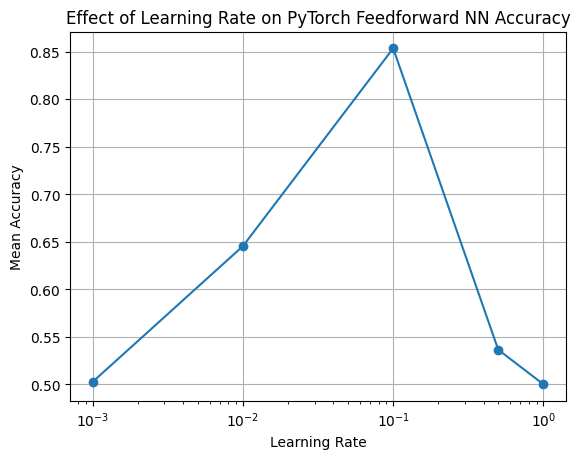

In [21]:
import matplotlib.pyplot as plt

plt.plot(learning_rates_to_try, mean_accuracies, marker='o', linestyle='-')
plt.title('Effect of Learning Rate on PyTorch Feedforward NN Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.xscale('log')  # Set x-axis to a logarithmic scale for better visualization
plt.grid(True)
plt.show()

In [22]:
mean_accuracies_continued=[]
learning_rates_to_try_continued = [0.05, 0.07, .09,0.1,.11, 0.12, 0.15]
for rate in learning_rates_to_try_continued:
    clf = CustomMLP(eta=rate)

    acc = kfold_eval_docs(clf, X_torch, y_torch)
    print(f"PyTorch Feedforward NN 10-fold CV accuracy= {np.mean(acc):.2f} {chr(177)}{np.std(acc):.3f}")
    mean_accuracies_continued.append(np.mean(acc))

PyTorch Feedforward NN 10-fold CV accuracy= 0.83 ±0.006
PyTorch Feedforward NN 10-fold CV accuracy= 0.85 ±0.009
PyTorch Feedforward NN 10-fold CV accuracy= 0.86 ±0.006
PyTorch Feedforward NN 10-fold CV accuracy= 0.86 ±0.004
PyTorch Feedforward NN 10-fold CV accuracy= 0.86 ±0.006
PyTorch Feedforward NN 10-fold CV accuracy= 0.85 ±0.007
PyTorch Feedforward NN 10-fold CV accuracy= 0.86 ±0.006


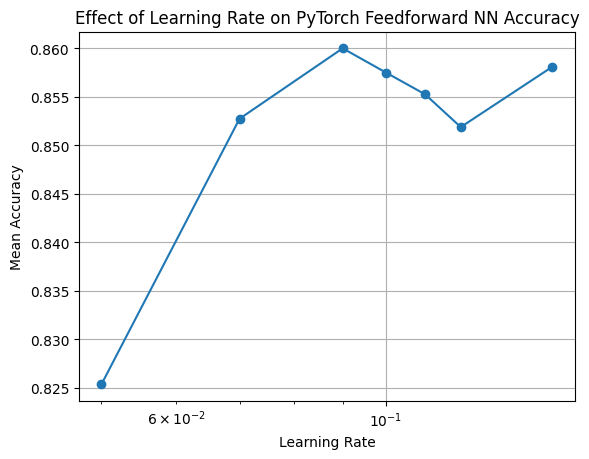

In [23]:
import matplotlib.pyplot as plt

plt.plot(learning_rates_to_try_continued, mean_accuracies_continued, marker='o', linestyle='-')
plt.title('Effect of Learning Rate on PyTorch Feedforward NN Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.xscale('log')  # Set x-axis to a logarithmic scale for better visualization
plt.grid(True)
plt.show()

Overall, it appears that the best learning rate is .1. Even when we dive in more closely, there appears to be no increase in accuracy after 1. After .1, the accuracy begins to decline rapidly.